In [10]:
library(igraph)
library(data.table)

ERROR: Error in library(data.table): there is no package called ‘data.table’


[1] 34
[1] 0.3128763


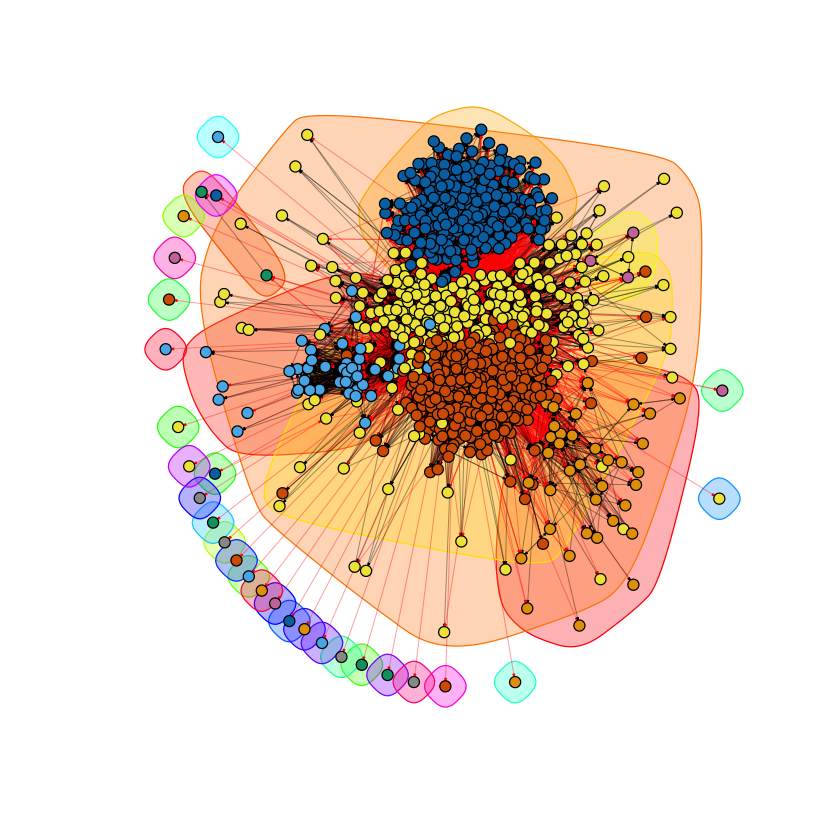

In [15]:
neighbors = read.table("../gplus/115625564993990145546.feat", colClasses = "character")
edges = read.table("../gplus/115625564993990145546.edges", colClasses = "character")
colnames(neighbors)[1] = "v1"
colnames(neighbors)[2] = "v2"
neighbors <- subset(neighbors, select=c("v1", "v2"))
id = strsplit("../gplus/115625564993990145546", "/")[[1]][[3]]
edge_list = as.vector(t(edges))
temp = neighbors[1]
neighbors[1] = id
neighbors[2] = temp
g <- graph_from_data_frame(neighbors, directed = TRUE, vertices = NULL)
g <- add_edges(g, edge_list)
walktrap <- walktrap.community(g)
print(length(sizes(walktrap)))
color_vector = walktrap$membership+1
vertex_vector = rep(4,vcount(g))
vertex_vector[1]=6
print(modularity(walktrap))
plot(walktrap,g,vertex.color=color_vector,vertex.label=NA,vertex.size=vertex_vector, edge.width=0.3, edge.arrow.size=0.1)

In [18]:
PATH = "../gplus/115625564993990145546.circles"
openFile_circle = file(PATH, open="r")
linesInCircle = readLines(openFile_circle)
print(length(linesInCircle))
circlemember = seq_len(0)
a=seq_len(0)
circlemember=seq_len(0)
print(length(linesInCircle))
# for(i in 1:length(linesInCircle)){
#     circlex=linesInCircle[i]
#     circlememberx= strsplit(circlex, "\t")[[1]] 
#     circlemember=c(circlemember,circlememberx)
#     a=c(a,(length(circlememberx)-1))
# }
# circlemember_new=unique(circlemember)

C <- matrix(0, nrow = 31, ncol = 34)
col <- 1
row <- 1
for (i in 1:length(linesInCircle)){
    circlex=linesInCircle[i]
    circlememberx= strsplit(circlex, "\t")[[1]]
    for (j in 1:length(walktrap)) {
        for (k in walktrap[[j]]) {
            if (k %in% circlememberx) {
                C[i, j] <- C[i, j] + 1
            }
        }
    }
    circlemember=c(circlemember,circlememberx)
    a=c(a,(length(circlememberx)-1))
}


[1] 31
[1] 31


In [19]:
print(C)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    0    3    0    3    0    0    0     0     0     0     0
 [2,]    0    0    0    4    0    5    0    0    0     0     0     0     0
 [3,]    0    3    0   18    0  148    0    0    0     0     0     0     0
 [4,]    0    3    0   21    0  252    0    0    0     0     0     0     0
 [5,]    0    1    0   39    0  285    0    0    0     0     0     0     0
 [6,]    0    3    0    8    0   82    0    0    0     0     0     0     0
 [7,]    0    0    0   63    0   10    0    0    0     0     0     0     0
 [8,]    0    2    0   86  229   21    0    0    0     0     0     0     0
 [9,]    0    1    0   31    1   13    0    0    0     0     0     0     0
[10,]    0    0    0   57    0    5    0    0    0     0     0     0     0
[11,]    0    4    0   88   77  168    1    0    0     0     0     0     0
[12,]    0    2    0   20  229    4    0    0    0     0     0     0     0
[13,]    1    3    0  143